<a href="https://colab.research.google.com/github/Rampawardz/Python/blob/main/OutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv("/content/StudentsPerformance.csv")

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [6]:
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [7]:
# Summary statistics
print(data.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


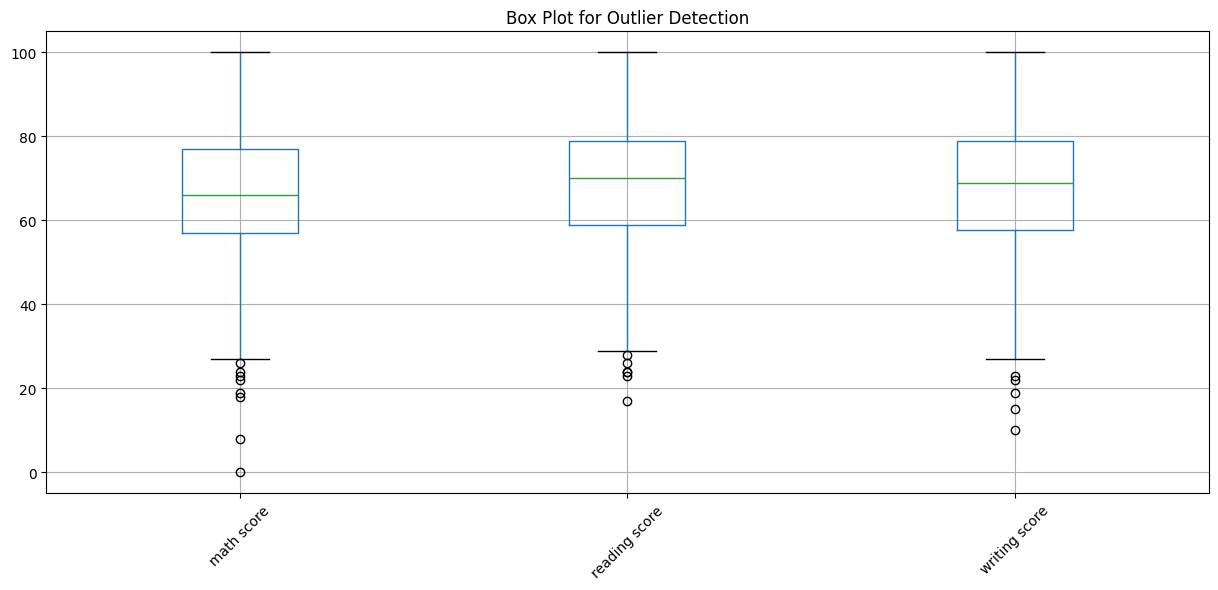

In [8]:
# Visualizing data for outliers
# Plot box plots for all numeric columns
plt.figure(figsize=(15, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot for Outlier Detection')
plt.show()


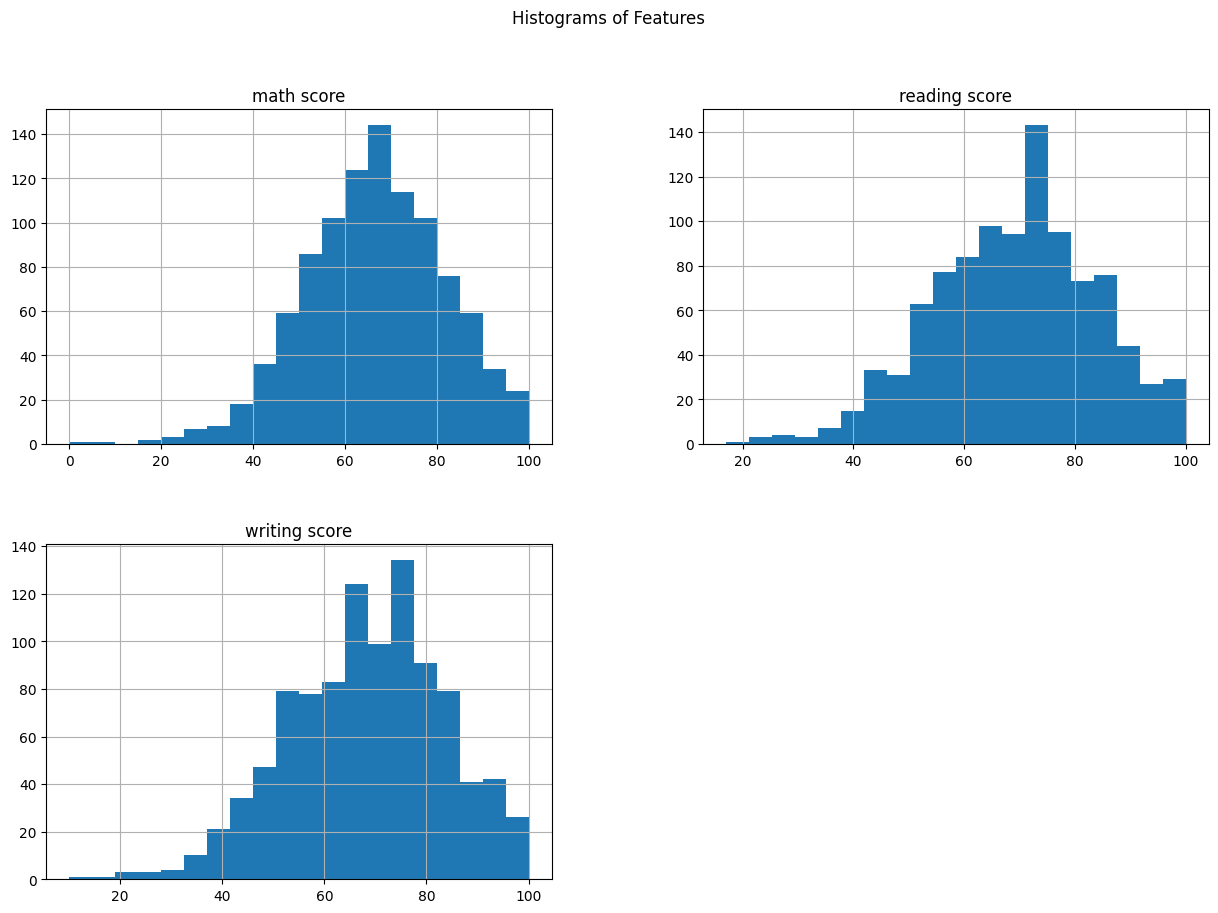

In [9]:
# Histogram
data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()


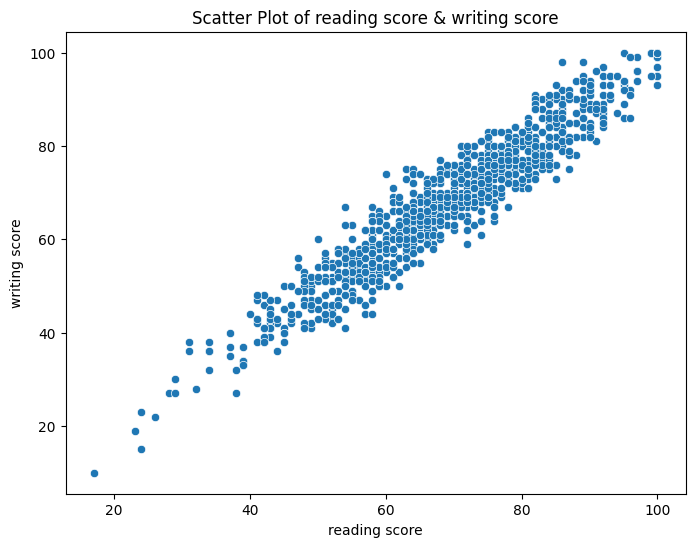

In [10]:
# Example: Plot 'MEDV' vs. 'RM' to check for outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['reading score'], y=data['writing score'])
plt.title('Scatter Plot of reading score & writing score')
plt.show()


In [19]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Detect and remove rows with outliers in numeric columns
outlier_condition = ~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to the entire dataset (numeric + non-numeric)
data_cleaned = data[outlier_condition]

print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", data_cleaned.shape)




Shape before removing outliers: (1000, 8)
Shape after removing outliers: (988, 8)


In [20]:
from scipy.stats import zscore

# Calculate Z-scores for numeric columns
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))

# Identify outliers
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outlier positions (row, column):", outliers)


Outlier positions (row, column): (array([ 17,  59,  59,  59,  76, 327, 327, 596, 596, 787, 980, 980]), array([0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1]))


In [21]:
data_capped = data.copy()
for col in data.select_dtypes(include=[np.number]).columns:
    data_capped[col] = np.where(data[col] > Q3[col] + 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col],
                                np.where(data[col] < Q1[col] - 1.5 * IQR[col], Q1[col] - 1.5 * IQR[col], data[col]))


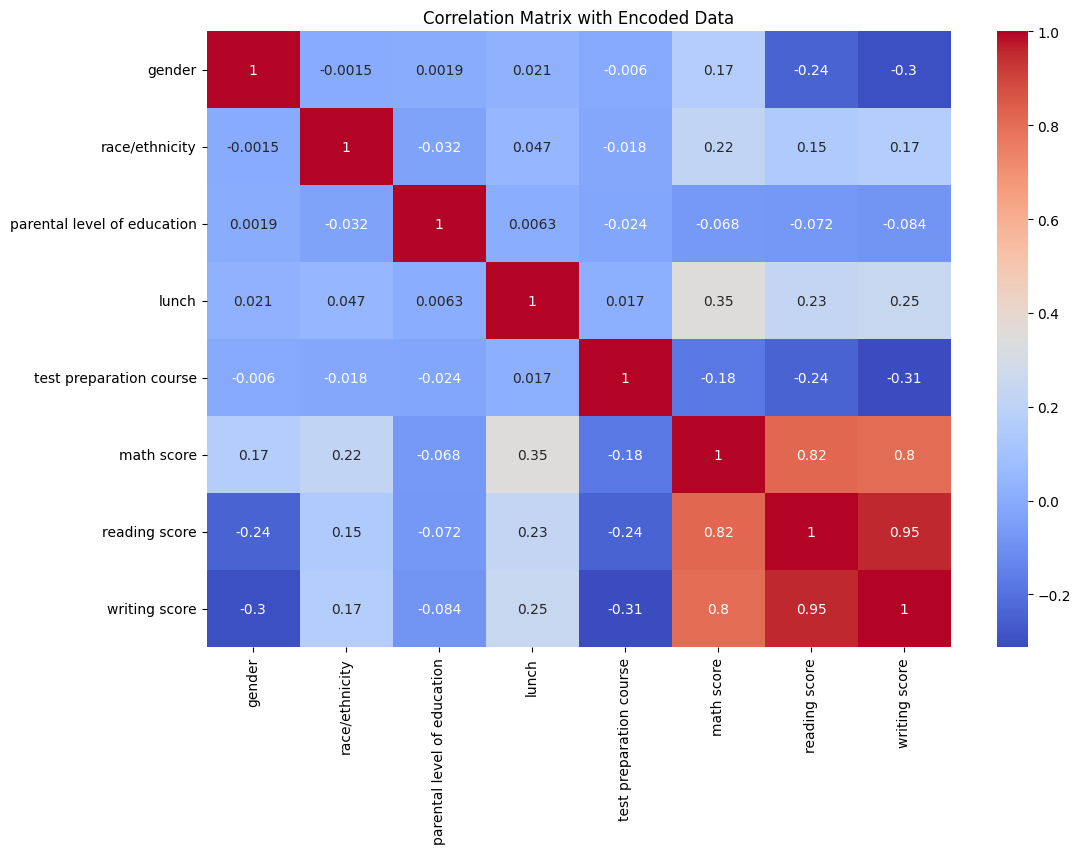

In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Retry the heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Data')
plt.show()
